In [6]:
import pandas as pd

df_train = pd.read_csv('../../data/manual/train_set.csv')
df_test = pd.read_csv('../../data/manual/test_set.csv')

X_train = df_train.drop(columns=['Cs'])
y_train = df_train['Cs']
X_test = df_test.drop(columns=['Cs'])
y_test = df_test['Cs']

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(440, 19) (440,) (142, 19) (142,)


In [7]:
from tabpfn import TabPFNRegressor

# 初始化TabPFN回归模型
model = TabPFNRegressor()

# 训练模型
model.fit(X_train, y_train)

# 预测
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [8]:
from scripts.evaluate_model import ModelEvaluator

evaluator = ModelEvaluator(model_name='TabPFN', y_train=y_train, y_train_pred=y_train_pred, y_test=y_test, y_test_pred=y_test_pred)
df_metrics = evaluator.metrics_to_dataframe()
df_metrics.to_csv('../results/reports/metrics_TabPFN_manual.csv', index=False)
df_metrics

,model,R2_train,MAE_train,MAPE_train,RMSE_train,R2_test,MAE_test,MAPE_test,RMSE_test
0,TabPFN,0.999,6.6,2.24,11.5,0.346,194.46,37.92,278.12


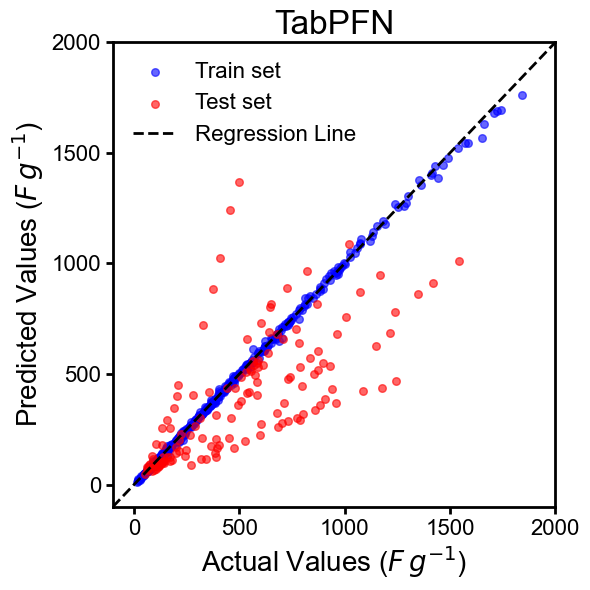

In [9]:
figpath = '../results/figures/avp_TabPFN_manual.png'
evaluator.plot_actual_vs_predicted(figpath=figpath)